In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import random
from matplotlib import pyplot as plt
from image_utils import draw_lines, draw_lines_polar

In [2]:
img = cv2.imread('football.png')
print(img.size)
cv2.imshow('image', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()

167256


In [3]:
#Aplicamos filtro gaussiano para eliminar ruido
filter_size = 5 #El filtro tiene que ser numero impar
img_gauss = cv2.GaussianBlur(img,(filter_size,filter_size), sigmaX=1)
#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

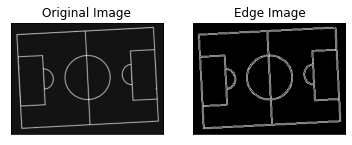

In [4]:
##https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
img = cv2.imread('football.png',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

55752

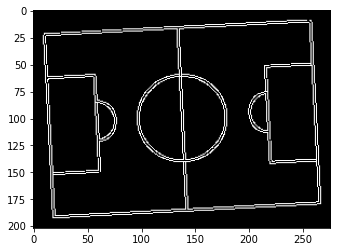

In [6]:
shape = edges.shape

width = shape[0]
length = shape[1]

plt.imshow(edges,cmap = 'gray')
# plt.axis([0, 300, 0, 300])
202*276

In [7]:
border_coordinates = []

for x in range(len(edges)):
    for y in range(len(edges[x])):
        
        if(edges[x][y] > 0): border_coordinates.append(y,x)

TypeError: list.append() takes exactly one argument (2 given)

In [8]:
# x = []
# y = []


# for coordinate in border_coordinates:
#     x.append(coordinate[0])
#     y.append(coordinate[1])

# plt.plot(x,y, 'ro')
# # plt.axis([0, largo, 0, ancho])
# plt.show()

In [9]:

def calculate_line(a,b):
    
    m = (b[1]-a[1])/(b[0]-a[0])
    b = a[1] - m*a[0]
    return (m, b)
    
def calculate_inliner(recta, punto, tolerance):

    m = recta[0]
    b = recta[1]
    y = m*punto[0] + b

    if(abs(y - punto[1]) < tolerance): return True
    else: return False
    #valor = punto[1] - m*punto[0]
    #if(abs(valor - b) < tolerancia): return True
    
def total_inliners(rect, tolerance, border_coordinates):
    inliners = 0
    for point in border_coordinates:
        if(calculate_inliner(rect, point, tolerance)): inliners+= 1
    return inliners

In [10]:
# recta = calculate_line([1,2],[3,4])
# print(f'y = {recta[0]}x + {recta[1]}')
# '''
# print(f'{recta[0]}x + {recta[1]}y + {recta[2]} = 0')
# print(f'{recta[0]}x + {recta[1]}y = {-recta[2]}')
# '''

In [11]:

# a = border_coordinates[random.randint(0, len(border_coordinates) - 1)]
# b = border_coordinates[random.randint(0, len(border_coordinates) - 1)]
# recta = calculate_line(a,b)
# inliners = total_inliners(recta, 10, border_coordinates)
# print(a,b)
# #print(f"Recta: {recta[0]}x + {recta[1]}y = {-recta[2]}")
# print(f'y = {recta[0]}x + {recta[1]}')
# print("Inliners: ", inliners)

In [14]:

def ransac(edges_points, iterations, needed_inliers, tolerance):

    lines = []

    for iterations in range(iterations):

        a = edges_points[random.randint(0, len(edges_points) -1)]
        b = edges_points[random.randint(0, len(edges_points) -1)]
        
        #print(a,b)
        if(a[0] != b[0]):
            r = calculate_line(a,b)
            inliners = total_inliners(r, tolerance, edges_points)

            if(inliners >= needed_inliers): lines.append((r))
    
    return lines

[(-0.052083333333333336, 191.44791666666666), (-1.0, 183.0), (-0.05, 21.6), (-0.0625, 193.5625), (-0.047058823529411764, 190.88235294117646), (-0.04861111111111111, 190.89583333333334), (-0.05172413793103448, 193.22413793103448), (-0.06666666666666667, 194.0), (-0.05042016806722689, 23.722689075630253), (-0.03787878787878788, 190.0681818181818), (-0.05660377358490566, 24.49056603773585), (-0.05555555555555555, 191.77777777777777), (-0.05555555555555555, 23.77777777777778), (-0.052083333333333336, 23.947916666666668), (-0.05, 21.7), (-0.049586776859504134, 193.23140495867767), (-0.043010752688172046, 190.93548387096774), (-0.057692307692307696, 192.05769230769232), (-0.054945054945054944, 22.208791208791208), (-0.0, 19.0), (-0.044444444444444446, 22.577777777777776), (-0.05714285714285714, 22.514285714285712), (-0.05405405405405406, 193.56756756756758), (-0.04819277108433735, 192.6144578313253), (-0.046511627906976744, 190.65116279069767), (-0.05, 23.45), (0.011764705882352941, 136.2941

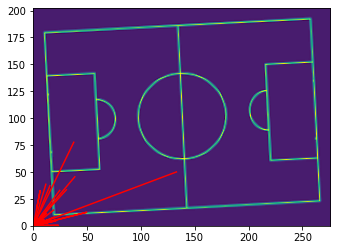

In [15]:
result = ransac(border_coordinates, 1000, 30, 0.15)
print(result)
#for r in x:
#    print(f'y = {recta[0]}x + {recta[1]}')
# for line in result:
#     dra

# draw_lines_polar(img,result)
draw_lines(img,result)

[(-0.052083333333333336, 191.44791666666666), (-1.0, 183.0), (-0.05, 21.6), (-0.0625, 193.5625), (-0.047058823529411764, 190.88235294117646), (-0.04861111111111111, 190.89583333333334), (-0.05172413793103448, 193.22413793103448), (-0.06666666666666667, 194.0), (-0.05042016806722689, 23.722689075630253), (-0.03787878787878788, 190.0681818181818), (-0.05660377358490566, 24.49056603773585), (-0.05555555555555555, 191.77777777777777), (-0.05555555555555555, 23.77777777777778), (-0.052083333333333336, 23.947916666666668), (-0.05, 21.7), (-0.049586776859504134, 193.23140495867767), (-0.043010752688172046, 190.93548387096774), (-0.057692307692307696, 192.05769230769232), (-0.054945054945054944, 22.208791208791208), (-0.0, 19.0), (-0.044444444444444446, 22.577777777777776), (-0.05714285714285714, 22.514285714285712), (-0.05405405405405406, 193.56756756756758), (-0.04819277108433735, 192.6144578313253), (-0.046511627906976744, 190.65116279069767), (-0.05, 23.45), (0.011764705882352941, 136.2941

In [ ]:
print(result)